# Chest X-Ray Images (Pneumonia)
5,863 images, 2 categories

### Context

[http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)

![](https://i.imgur.com/jZqpV51.png)

Figure S6. Illustrative Examples of Chest X-Rays in Patients with Pneumonia, Related to Figure 6  
The normal chest X-ray (left panel) depicts clear lungs without any areas of abnormal opacification in the image. Bacterial pneumonia (middle) typically exhibits a focal lobar consolidation, in this case in the right upper lobe (white arrows), whereas viral pneumonia (right) manifests with a more diffuse ‘‘interstitial’’ pattern in both lungs.  
[http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)

### Content

The dataset is organized into 3 folders (train, test, val) and contains subfolders for each image category (Pneumonia/Normal). There are 5,863 X-Ray images (JPEG) and 2 categories (Pneumonia/Normal).

Chest X-ray images (anterior-posterior) were selected from retrospective cohorts of pediatric patients of one to five years old from Guangzhou Women and Children’s Medical Center, Guangzhou. All chest X-ray imaging was performed as part of patients’ routine clinical care.

For the analysis of chest x-ray images, all chest radiographs were initially screened for quality control by removing all low quality or unreadable scans. The diagnoses for the images were then graded by two expert physicians before being cleared for training the AI system. In order to account for any grading errors, the evaluation set was also checked by a third expert.

### Acknowledgements

Data: [https://data.mendeley.com/datasets/rscbjbr9sj/2](https://data.mendeley.com/datasets/rscbjbr9sj/2)

License: [CC BY 4.0](https://creativecommons.org/licenses/by/4.0/)

Citation: [http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5](http://www.cell.com/cell/fulltext/S0092-8674(18)30154-5)

![enter image description here](https://i.imgur.com/8AUJkin.png)

### Inspiration

Automated methods to detect and classify human diseases from medical images.

Link: https://www.kaggle.com/datasets/paultimothymooney/chest-xray-pneumonia

Help

* https://www.kaggle.com/code/arunrk7/covid-19-detection-pytorch-tutorial
* https://www.kaggle.com/code/krishnakalyan3/pneumonia-fastai-2-0-baseline

In [1]:
import numpy as np
import pandas as pd
from fastai.vision.all import *
import timm
from pathlib import Path

In [2]:
%load_ext nb_black

<IPython.core.display.Javascript object>

In [3]:
!tree -d ../../data/chest_xray/

../../data/chest_xray/
├── models
├── test
│   ├── NORMAL
│   └── PNEUMONIA
├── train
│   ├── NORMAL
│   └── PNEUMONIA
└── val
    ├── NORMAL
    └── PNEUMONIA

10 directories


<IPython.core.display.Javascript object>

# Prepare

In [4]:
path_list = list(Path("../../data/chest_xray/").rglob("*.jpeg"))

df = pd.DataFrame(
    {
        "image_id": [x.name for x in path_list],
        "path": [x.parts[-3] for x in path_list],
        "label": [x.parts[-2] for x in path_list],
        "imagePath": path_list,
    }
).set_index("image_id")
df["label"] = df["label"].replace({"NORMAL": 0, "PNEUMONIA": 1})
df

,path,label,imagePath
image_id,,,
IM-0095-0001.jpeg,test,0,../../data/chest_xray/test/NORMAL/IM-0095-0001.jpeg
NORMAL2-IM-0370-0001.jpeg,test,0,../../data/chest_xray/test/NORMAL/NORMAL2-IM-0370-0001.jpeg
NORMAL2-IM-0233-0001.jpeg,test,0,../../data/chest_xray/test/NORMAL/NORMAL2-IM-0233-0001.jpeg
IM-0030-0001.jpeg,test,0,../../data/chest_xray/test/NORMAL/IM-0030-0001.jpeg
IM-0029-0001.jpeg,test,0,../../data/chest_xray/test/NORMAL/IM-0029-0001.jpeg
...,...,...,...
person642_virus_1223.jpeg,train,1,../../data/chest_xray/train/PNEUMONIA/person642_virus_1223.jpeg
person413_bacteria_1832.jpeg,train,1,../../data/chest_xray/train/PNEUMONIA/person413_bacteria_1832.jpeg
person670_bacteria_2563.jpeg,train,1,../../data/chest_xray/train/PNEUMONIA/person670_bacteria_2563.jpeg


<IPython.core.display.Javascript object>

In [5]:
df["label"].value_counts(normalize=True)

1    0.729679
0    0.270321
Name: label, dtype: float64

<IPython.core.display.Javascript object>

In [6]:
X_train = df[df["path"] != "test"][["imagePath", "label"]]
X_train

,imagePath,label
image_id,,
NORMAL2-IM-1430-0001.jpeg,../../data/chest_xray/val/NORMAL/NORMAL2-IM-1430-0001.jpeg,0
NORMAL2-IM-1436-0001.jpeg,../../data/chest_xray/val/NORMAL/NORMAL2-IM-1436-0001.jpeg,0
NORMAL2-IM-1431-0001.jpeg,../../data/chest_xray/val/NORMAL/NORMAL2-IM-1431-0001.jpeg,0
NORMAL2-IM-1442-0001.jpeg,../../data/chest_xray/val/NORMAL/NORMAL2-IM-1442-0001.jpeg,0
NORMAL2-IM-1440-0001.jpeg,../../data/chest_xray/val/NORMAL/NORMAL2-IM-1440-0001.jpeg,0
...,...,...
person642_virus_1223.jpeg,../../data/chest_xray/train/PNEUMONIA/person642_virus_1223.jpeg,1
person413_bacteria_1832.jpeg,../../data/chest_xray/train/PNEUMONIA/person413_bacteria_1832.jpeg,1
person670_bacteria_2563.jpeg,../../data/chest_xray/train/PNEUMONIA/person670_bacteria_2563.jpeg,1


<IPython.core.display.Javascript object>

In [7]:
X_true = df[df["path"] == "test"][["imagePath", "label"]]
X_true

,imagePath,label
image_id,,
IM-0095-0001.jpeg,../../data/chest_xray/test/NORMAL/IM-0095-0001.jpeg,0
NORMAL2-IM-0370-0001.jpeg,../../data/chest_xray/test/NORMAL/NORMAL2-IM-0370-0001.jpeg,0
NORMAL2-IM-0233-0001.jpeg,../../data/chest_xray/test/NORMAL/NORMAL2-IM-0233-0001.jpeg,0
IM-0030-0001.jpeg,../../data/chest_xray/test/NORMAL/IM-0030-0001.jpeg,0
IM-0029-0001.jpeg,../../data/chest_xray/test/NORMAL/IM-0029-0001.jpeg,0
...,...,...
person1_virus_6.jpeg,../../data/chest_xray/test/PNEUMONIA/person1_virus_6.jpeg,1
person121_bacteria_580.jpeg,../../data/chest_xray/test/PNEUMONIA/person121_bacteria_580.jpeg,1
person147_bacteria_711.jpeg,../../data/chest_xray/test/PNEUMONIA/person147_bacteria_711.jpeg,1


<IPython.core.display.Javascript object>

In [8]:
BATCH_SIZE = 32
IMAGE_SIZE = 224

<IPython.core.display.Javascript object>

In [9]:
dls = ImageDataLoaders.from_df(
    X_train[["imagePath", "label"]],
    valid_pct=0.2,
    seed=42,
    bs=BATCH_SIZE,
    item_tfms=Resize(IMAGE_SIZE),
)

<IPython.core.display.Javascript object>

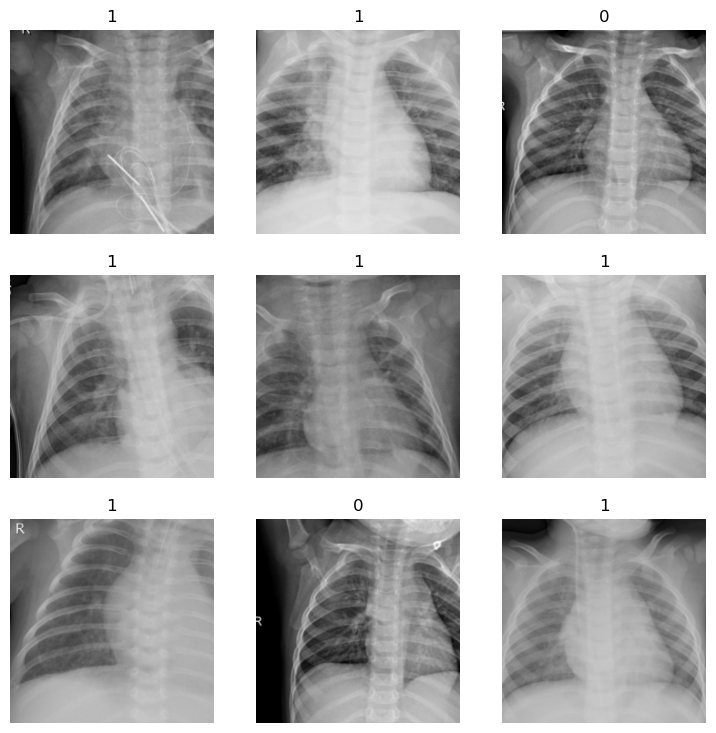

<IPython.core.display.Javascript object>

In [10]:
dls.train.show_batch()

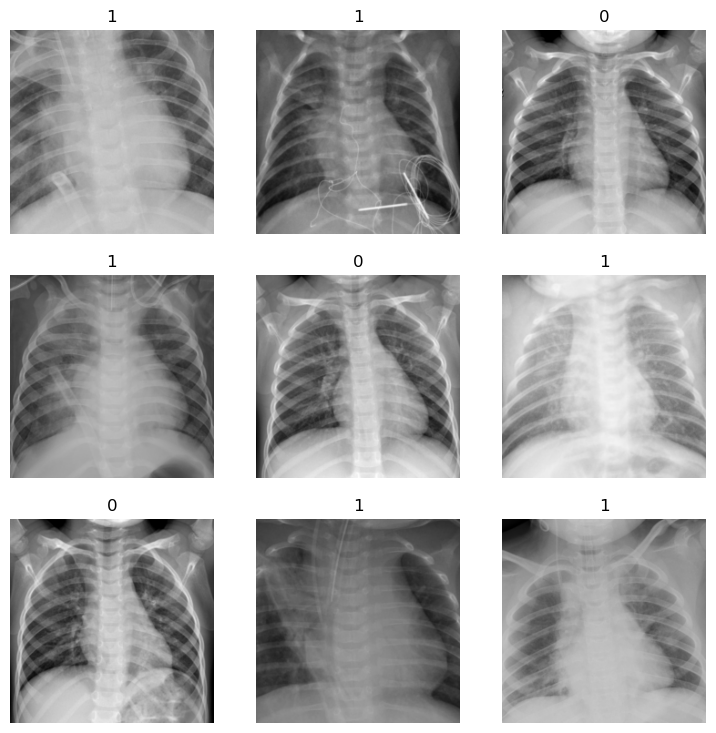

<IPython.core.display.Javascript object>

In [11]:
dls.valid.show_batch()

# Train

In [12]:
# timm.list_models(pretrained=True)

<IPython.core.display.Javascript object>

In [13]:
model = timm.create_model("densenet121", pretrained=True, num_classes=dls.c)

<IPython.core.display.Javascript object>

In [14]:
learn = Learner(dls, model, metrics=accuracy).to_fp16()
learn

<IPython.core.display.Javascript object>

SuggestedLRs(valley=0.00010964782268274575)

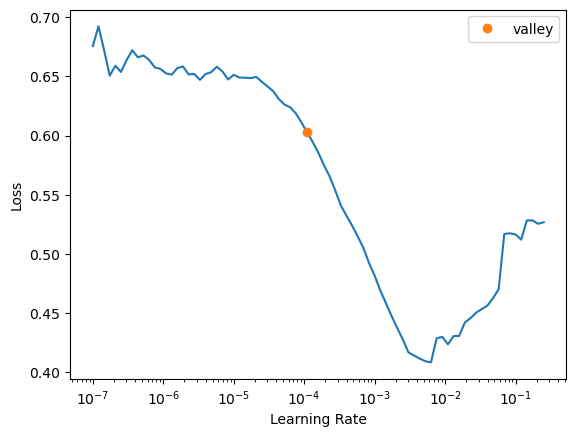

<IPython.core.display.Javascript object>

In [15]:
learn.lr_find()

In [16]:
learn.fit_one_cycle(
    10,
    1e-4,
    cbs=[
        SaveModelCallback(
            monitor="accuracy",
            comp=np.greater,
            with_opt=True,
        ),
    ],
)

epoch,train_loss,valid_loss,accuracy,time
0,0.342755,0.217534,0.934990,00:26
1,0.135962,0.097338,0.962715,00:26
2,0.067902,0.058157,0.975143,00:26
3,0.038378,0.067954,0.971319,00:27
4,0.023159,0.057300,0.977055,00:26
5,0.012392,0.034151,0.981836,00:26
6,0.007725,0.025706,0.990440,00:26
7,0.004227,0.029500,0.988528,00:26
8,0.003489,0.022432,0.994264,00:26
9,0.003926,0.022641,0.994264,00:26


Better model found at epoch 0 with accuracy value: 0.9349904656410217.
Better model found at epoch 1 with accuracy value: 0.9627150893211365.
Better model found at epoch 2 with accuracy value: 0.9751434326171875.
Better model found at epoch 4 with accuracy value: 0.9770554304122925.
Better model found at epoch 5 with accuracy value: 0.9818355441093445.
Better model found at epoch 6 with accuracy value: 0.990439772605896.
Better model found at epoch 8 with accuracy value: 0.9942638874053955.


<IPython.core.display.Javascript object>

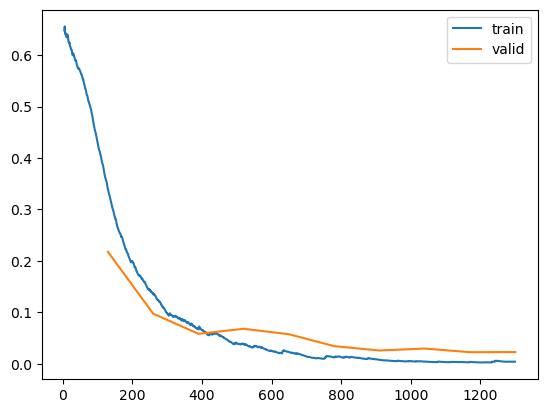

<IPython.core.display.Javascript object>

In [17]:
learn.recorder.plot_loss()

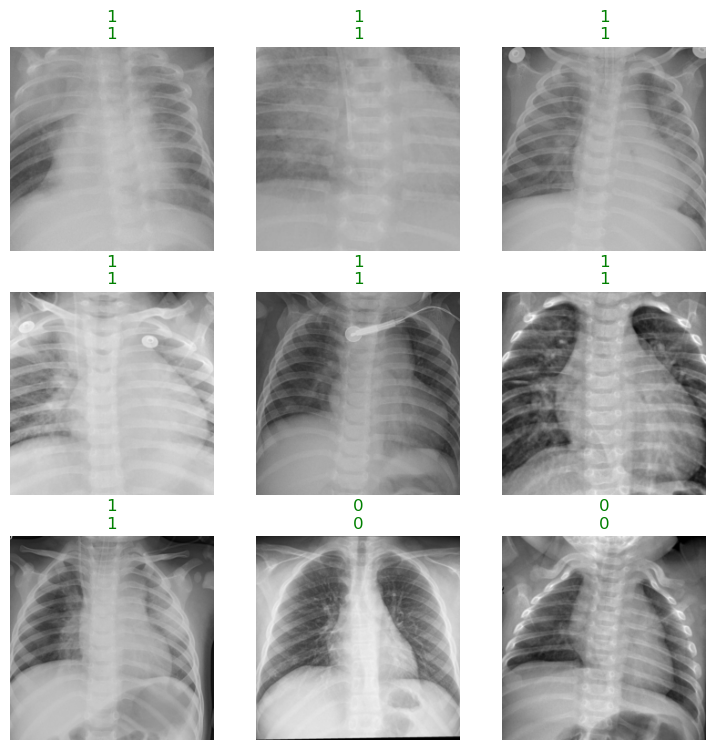

<IPython.core.display.Javascript object>

In [18]:
learn.show_results()

# Validate

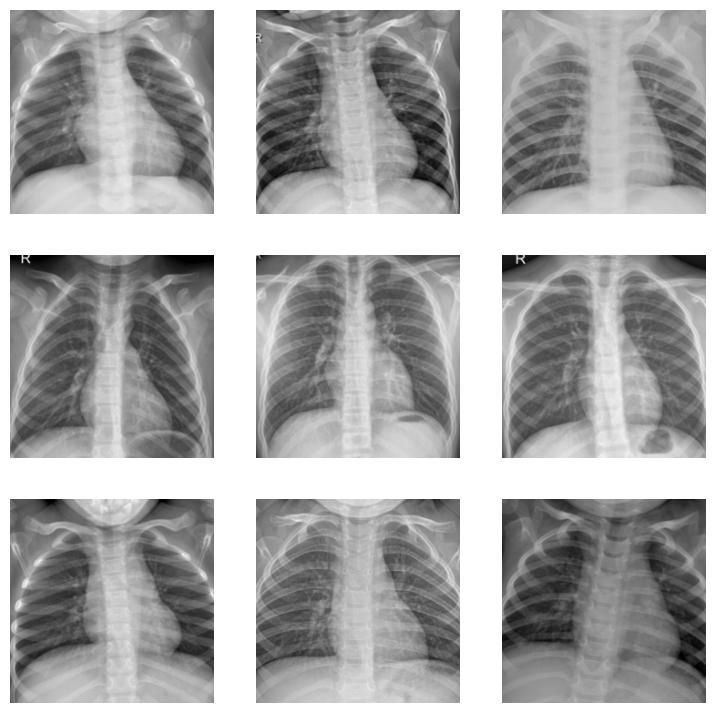

<IPython.core.display.Javascript object>

In [19]:
test_dl = dls.test_dl(X_true[["imagePath", "label"]])
test_dl.show_batch()

In [20]:
preds, _ = learn.tta(dl=test_dl, n=5, beta=0)
preds

tensor([[6.7598e-01, 3.2402e-01],
        [9.9587e-01, 4.1319e-03],
        [1.3107e-03, 9.9869e-01],
        ...,
        [1.6615e-04, 9.9983e-01],
        [3.4483e-04, 9.9966e-01],
        [2.5023e-05, 9.9998e-01]])

<IPython.core.display.Javascript object>

In [21]:
(X_true["label"] == preds.argmax(dim=-1).numpy()).sum() / len(X_true)

0.8365384615384616

<IPython.core.display.Javascript object>